In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('../data/raw/Mall_Customers.csv')
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.select_dtypes(include=['object']).columns

Index(['Gender'], dtype='object')

In [5]:
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0


In [6]:
# Drop the 'CustomerID' column as it is not needed for clustering
df.drop(columns=['CustomerID'], inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


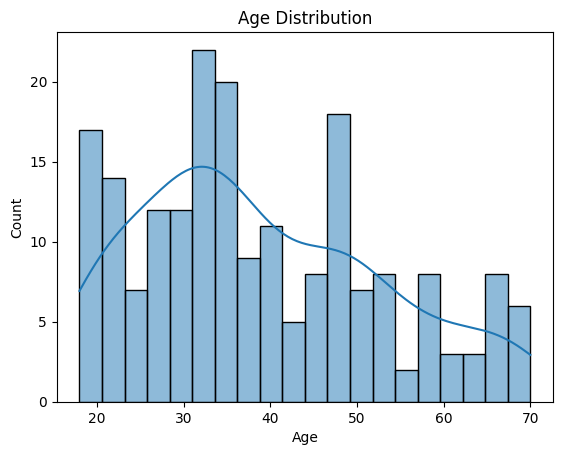

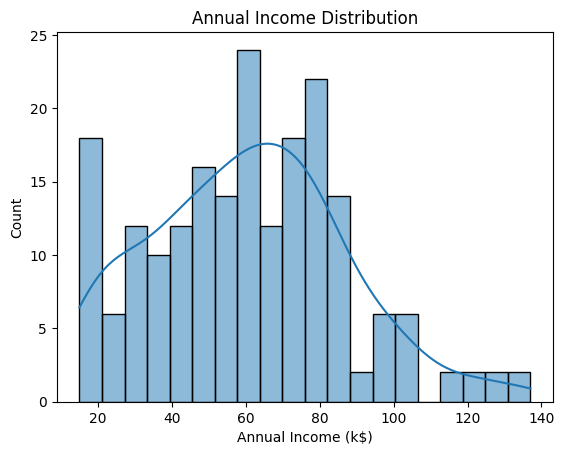

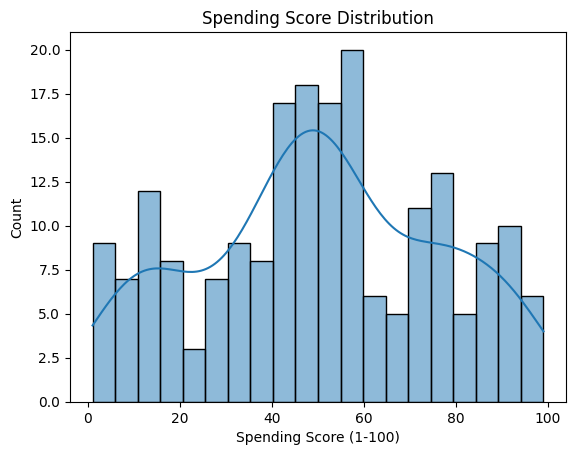

In [7]:
# Univariate analysis
# Visualizing the distribution of numerical features
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=20,kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=20,kde=True)
plt.title('Spending Score Distribution')
plt.show()

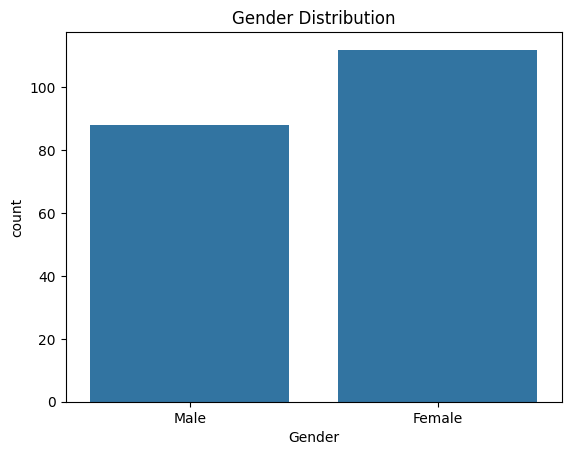

In [8]:
# Univariate analysis
# visualizing categorical features
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()


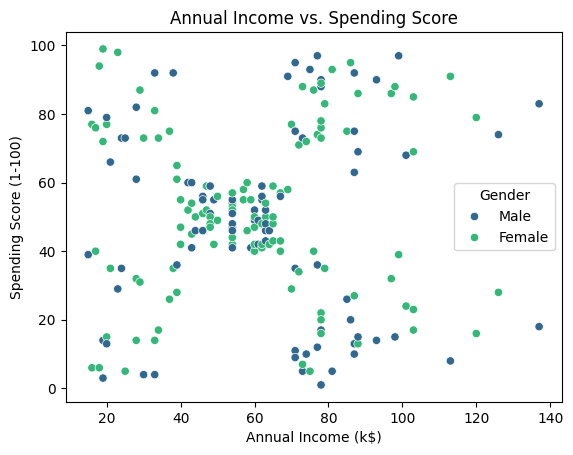

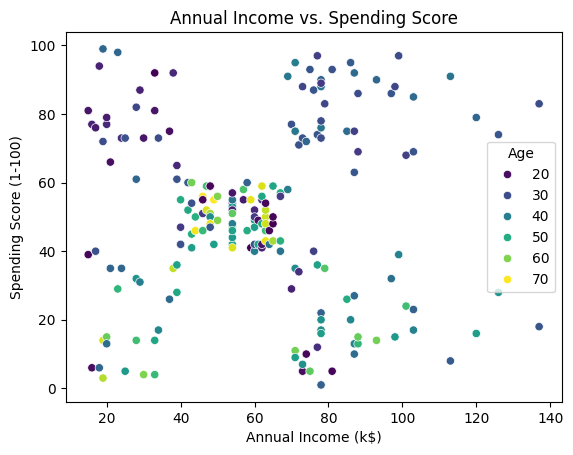

In [9]:
# Bivariate Analysis
# Income vs. Spending Score based on Gender
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Annual Income vs. Spending Score')
plt.show()

# Income vs. Spending Score based on Age
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', palette='viridis')
plt.title('Annual Income vs. Spending Score')
plt.show()

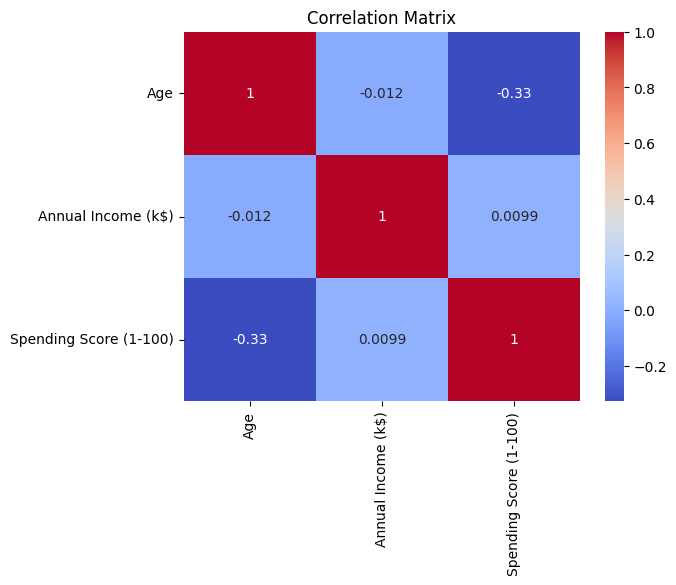

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Saving the cleaned DataFrame without 'CustomerID'
df.to_csv('../data/processed/mall_customers_clean.csv', index=False)